In [81]:
# Import the necessary features for this report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress
from sklearn import linear_model
import statsmodels.formula.api as smf
import pickle

# Improve the aesthetics
sns.set_style("white")

# Read the csv file. 'thousands' is used to format out the ',' when it appears in the numbers, skiprows will get rid of the first four rows (could also use skipheader), 
# skipfooter will remove the bottom three rows where the footnotes are located.
df = pd.read_pickle('C:\\Users\\maken\\2.4.2_Drill_Prepared_Data.pkl')



In [76]:
df.head()

,City,Population,Murder,Robbery,Property crime
0,Adams Village,1861,0,0,12
1,Addison Town and Village,2577,0,0,24
2,Akron Village,2846,0,0,16
3,Albany,97956,8,227,4090
4,Albion Village,6388,0,4,223


In [77]:
df_cleaned = df

# Time to make some features. Let's make these x/person.
df_cleaned['Robbery_per_thousand'] = df_cleaned['Robbery']/(df_cleaned['Population']/1000)
df_cleaned['Murder_per_thousand'] = df_cleaned['Murder']/(df_cleaned['Population']/1000)

df_cleaned['Robbery_0'] = np.where(df['Robbery'] == 0, 0, 1)
df_cleaned['Murder_0'] = np.where(df['Murder'] == 0, 0, 1)

df_cleaned['Population2'] = df_cleaned['Population'] * df_cleaned['Population']

In [78]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_cleaned['Property\ncrime'].values.reshape(-1, 1)
X = df_cleaned[['Population', 'Population2', 'Murder_0', 'Robbery_0', 'Murder_per_thousand', 'Robbery_per_thousand']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  3.02034479e-02  -1.58480786e-09  -6.27128615e+02  -1.83833341e+02
    6.26996068e+03   3.28873370e+02]]

Intercept: 
 [-88.36668839]

R-squared:
0.99725316521


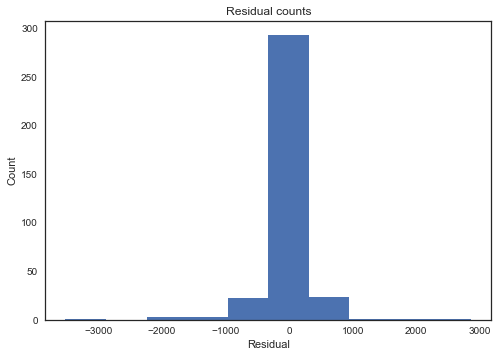

In [79]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df_cleaned['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

The high R-squared and the high counts of low residuals shows the accuracy of this model in predicting Property Crimes in NYC in 2013

In [84]:
pickle.dump(regr, open('C:\\Users\\maken\\NY_Property_Crimes_Regression_Model', 'wb'))

df_cleaned.to_pickle('C:\\Users\\maken\\2.4.4_Challenge_Prepared_Data.pkl')